In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io
import scipy.constants
from pynufft import NUFFT
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "browser"
import sys
sys.path.append('./Modules')
import monostatic_reconstruct as mr

mm = 1E-3
C = scipy.constants.c

### Load data & antenna coordinates

In [2]:
d_antennas = .035        # distance between tx/rx antennas
fc = 22E9
bw = 8E9

mat = scipy.io.loadmat(r'..\..\Data\wall1_no_drywall_2022-11-04.mat')
notes = list(mat['notes'])
print('NOTES:')
for i in range(len(notes)):
        print(notes[i])
f = mat['f'][0,:]
Xa = np.flip(mat['X']*mm, axis=(0,1))   # flipping to recover right-handed coordinate systems
Ya = np.flip(mat['Y']*mm, axis=(0,1))       # flipping because origin of scan stage was at top left
Za = np.zeros_like(Xa)
measurements = np.flip(mat['measurements'], axis=(0,1))
z_offset = mat['z_offset'][0,0]*mm

### load background
mat = scipy.io.loadmat(r'..\..\Data\background_2022-10-29.mat')
bg = np.flip(mat['measurements'], axis=(0,1))

### subtract background from measurements
measurements = measurements - bg

NOTES:
Wall with studs, wires, empty PVC pipes, and light switch.
No drywall.                                               


### Remove probe phase

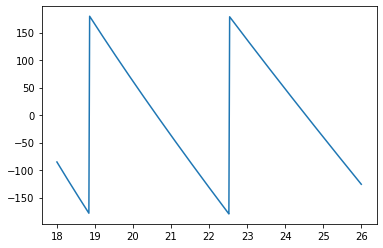

In [3]:
lam = C/f
k = 2*np.pi/lam

L_horn = .0298
a_horn = 10.668*mm      # WR42
b_horn = 4.318*mm
beta_g = np.sqrt(k**2 - (np.pi/a_horn)**2)
phase_error = np.exp(-1j*2*beta_g*L_horn)    # 2 for transmit and receive path

measurements = measurements / phase_error[None,None,:]

plt.figure()
plt.plot(f*1E-9, np.degrees(np.angle(phase_error)))
plt.show()

### Reconstruct

In [8]:
recon = mr.MonostaticReconstruction(f, Xa, Ya, z_offset, measurements)
recon.reconstruct((1, 1, .6), (5*mm, 5*mm, 5*mm), Lxa=0.6, Lya=0.6, fc=fc, bw=bw, delta_f_indx=4, scene_offsets=(0,0,z_offset), method='RMA-NUFFT')

c:\Users\User\Documents\Metacept\Projects\TWI\Experiment\Monostatic Experiments - Shared\Code\twi_experiments\./Modules\monostatic_reconstruct.py:95: RuntimeWarning:

divide by zero encountered in true_divide

c:\Users\User\Documents\Metacept\Projects\TWI\Experiment\Monostatic Experiments - Shared\Code\twi_experiments\./Modules\monostatic_reconstruct.py:95: RuntimeWarning:

invalid value encountered in true_divide



### Plot

In [7]:
# recon.resample(.5)
recon.plot(plot_type='xy', scale='linear', cmap='turbo', colormin=0, colormax=1)
# recon.plot(plot_type='section', slice_axis='z', scale='linear', cmap='turbo', colormin=0, colormax=.5)
# recon.plot(plot_type='3D', scale='linear', cmap='Turbo', colormin=0, colormax=.5, surface_count=20)

In [69]:
lam = C/f
k = 2*np.pi/lam

a_horn = 10.668*mm      # WR42
b_horn = 4.318*mm
beta_g = np.sqrt(k**2 - (np.pi/a_horn)**2)

L_list = np.linspace(0, .05, 100)
im_array = np.empty((recon.image.shape[0], recon.image.shape[1], recon.image.shape[2], L_list.size), dtype=np.complex64)

plt.figure()
for i in range(L_list.size):
    print('i = ', i)
    phase_error = np.exp(-1j*2*beta_g*L_list[i])    # 2 for transmit and receive path

    measurements_new = measurements / phase_error[None,None,:]

    recon = mr.MonostaticReconstruction(f, Xa, Ya, z_offset, measurements_new)
    recon.reconstruct((1, 1, .6), (5*mm, 5*mm, 5*mm), Lxa=0.6, Lya=0.6, fc=fc, bw=bw, delta_f_indx=4, scene_offsets=(0,0,z_offset), method='RMA-interp')
    im_array[:,:,:,i] = recon.image

i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
i =  10
i =  11
i =  12
i =  13
i =  14
i =  15
i =  16
i =  17
i =  18
i =  19
i =  20
i =  21
i =  22
i =  23
i =  24
i =  25
i =  26
i =  27
i =  28
i =  29
i =  30
i =  31
i =  32
i =  33
i =  34
i =  35
i =  36
i =  37
i =  38
i =  39
i =  40
i =  41
i =  42
i =  43
i =  44
i =  45
i =  46
i =  47
i =  48
i =  49
i =  50
i =  51
i =  52
i =  53
i =  54
i =  55
i =  56
i =  57
i =  58
i =  59
i =  60
i =  61
i =  62
i =  63
i =  64
i =  65
i =  66
i =  67
i =  68
i =  69
i =  70
i =  71
i =  72
i =  73
i =  74
i =  75
i =  76
i =  77
i =  78
i =  79
i =  80
i =  81
i =  82
i =  83
i =  84
i =  85
i =  86
i =  87
i =  88
i =  89
i =  90
i =  91
i =  92
i =  93
i =  94
i =  95
i =  96
i =  97
i =  98
i =  99


<Figure size 432x288 with 0 Axes>

In [252]:
indx = 59
print(L_list[indx])

0.0297979797979798


60


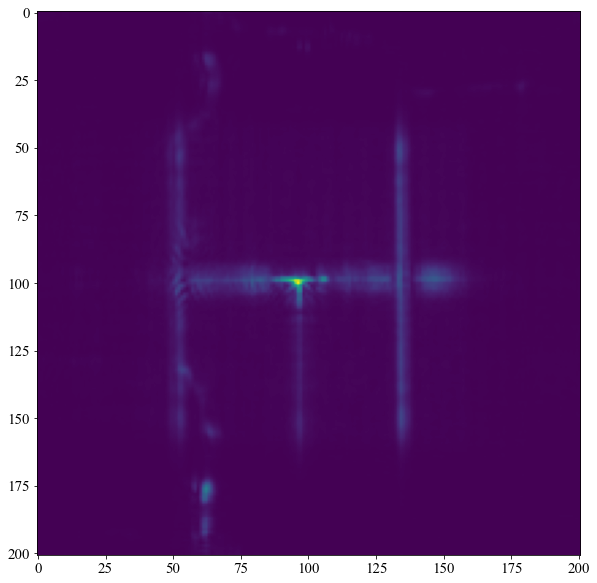

In [251]:
im_plot = np.transpose(np.fliplr(np.mean(np.abs(im_array[:,:,:,indx])**2, axis=2)))

plt.figure(figsize=(10,10))
plt.imshow(im_plot)

indx += 1
print(indx)